Notebook to combine and bin data for the NHL from 2014-2019

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
data1 = "nhl odds 2014-15.csv"
data2 = "nhl odds 2015-16.csv"
data3 = "nhl odds 2016-17.csv"
data4 = "nhl odds 2017-18.csv"
data5 = "nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)

In [33]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136


In [34]:
p_dif = []

for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)
        
df['Point_Dif'] = p_dif
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4


In [35]:
ml_pays_result = []

for i in range(0, df.shape[0]):
    if df['Close'].iloc[i] < 0:
        result = -100/df['Close'].iloc[i]
        ml_pays_result.append(result)
    else:
        result = df['Close'].iloc[i]/100
        ml_pays_result.append(result)
        
df['ML_Pays'] = ml_pays_result
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000


In [36]:
pl_pays_result = []

for i in range(0, df.shape[0]):
    if df['Unnamed: 11'].iloc[i] < 0:
        result = -100/df['Unnamed: 11'].iloc[i]
        pl_pays_result.append(result)
    else:
        result = df['Unnamed: 11'].iloc[i]/100
        pl_pays_result.append(result)
        
df['PL_Pays'] = pl_pays_result
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381,0.327869
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667


In [37]:
ml_outcome = []

for i in range(0, df.shape[0]):
    if df['Point_Dif'].iloc[i] > 0:
        result = 100*df['ML_Pays'].iloc[i]
        ml_outcome.append(result)
    else:
        result = -100
        ml_outcome.append(result)
        
df['ML_Outcome'] = ml_outcome
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000


In [38]:
pl_outcome = []

for i in range(0, df.shape[0]):
    if df['Point_Dif'].iloc[i] >= 2:
        result = 100*df['PL_Pays'].iloc[i]
        pl_outcome.append(result)
    elif (df['Point_Dif'].iloc[i] <= 1) & (df['Puck Line'].iloc[i] == -1.5):
        result = -100
        pl_outcome.append(result)
    elif (df['Point_Dif'].iloc[i] >= -1) & (df['Puck Line'].iloc[i] == 1.5):
        result = 100*df['PL_Pays'].iloc[i]
        pl_outcome.append(result)
    else:
        result = -100
        pl_outcome.append(result)
        
df['PL_Outcome'] = pl_outcome
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,1008,1,V,Montreal,1,1,2,4,-105,-105,...,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885
1,1008,2,H,Toronto,2,0,1,3,-115,-115,...,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.000000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,...,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556
3,1008,4,H,Boston,1,0,1,2,-195,-185,...,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.000000
4,1008,5,V,SanJose,1,3,0,4,101,130,...,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667


In [39]:
# Create row to see who won or loss by checking the point diferential was positive or negative.
def set_winner(row):
    if row['Point_Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'

def set_pl_winner(row):
    if row['PL_Outcome'] > 0:
        return 'Won'
    else:
        return 'Loss'
# add the result column 
df = df.assign(ML_Result=df.apply(set_winner, axis=1)) 
df = df.assign(PL_Result=df.apply(set_pl_winner, axis=1))
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome,ML_Result,PL_Result
0,1008,1,V,Montreal,1,1,2,4,-105,-105,...,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885,Won,Won
1,1008,2,H,Toronto,2,0,1,3,-115,-115,...,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.000000,Loss,Loss
2,1008,3,V,Philadelphia,0,0,1,1,165,165,...,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556,Loss,Won
3,1008,4,H,Boston,1,0,1,2,-195,-185,...,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.000000,Won,Loss
4,1008,5,V,SanJose,1,3,0,4,101,130,...,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667,Won,Won


In [8]:
away_df = df[df['VH']=='V'].reset_index()
home_df = df[df['VH']=='H'].reset_index()

In [9]:
away_df.head()

,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,0,1008,1,V,Montreal,1,1,2,4,-105,...,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885
1,2,1008,3,V,Philadelphia,0,0,1,1,165,...,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556
2,4,1008,5,V,SanJose,1,3,0,4,101,...,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667
3,6,1008,7,V,Vancouver,1,2,1,4,-131,...,230.0,5.5,123,5.0,-140,2,0.793651,2.300000,79.365079,230.000000
4,8,1009,51,V,Montreal,0,0,1,2,115,...,-245.0,5.5,-105,5.5,115,1,1.250000,0.408163,125.000000,40.816327


In [10]:
home_df.head()

,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,1,1008,2,H,Toronto,2,0,1,3,-115,...,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.0
1,3,1008,4,H,Boston,1,0,1,2,-195,...,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.0
2,5,1008,6,H,LosAngeles,0,0,0,0,-121,...,200.0,5.5,-147,5.0,116,-4,0.666667,2.000000,-100.000000,-100.0
3,7,1008,8,H,Calgary,0,2,0,2,111,...,-275.0,5.5,-143,5.0,120,-2,1.060000,0.363636,-100.000000,-100.0
4,9,1009,52,H,Washington,1,0,0,1,-135,...,205.0,5.5,-115,5.5,-135,-1,0.689655,2.050000,-100.000000,-100.0


In [11]:
home_df['ML_Outcome'].sum()

-29624.858063309508

In [12]:
home_df['PL_Outcome'].sum()

-25367.159463265205

In [13]:
away_df['ML_Outcome'].sum()

-16908.364093531975

In [14]:
away_df['PL_Outcome'].sum()

-27575.681092115858

In [15]:
fav_df = df[df['Puck Line']== -1.5].reset_index()
ud_df = df[df['Puck Line']== 1.5].reset_index()

In [16]:
fav_df['ML_Outcome'].sum()

-18217.1987315893

In [17]:
ud_df['ML_Outcome'].sum()

-28139.69225642102

In [18]:
fav_df['PL_Outcome'].sum()

-30249.87611154274

In [19]:
ud_df['PL_Outcome'].sum()

-22092.964443838315

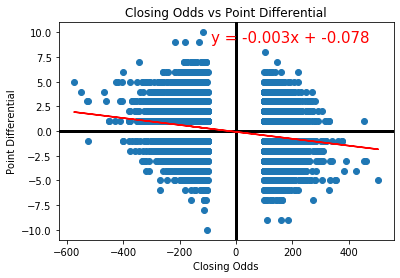

In [20]:
x_values = df['Close']
y_values = df['Point_Dif']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90, 9),fontsize=15,color="red")
plt.axhspan(-0.1, 0.1, -700, 700, color="black")
plt.axhspan(-12, 12, 0.528, 0.532, color="black")
plt.title('Closing Odds vs Point Differential')
plt.ylim(-11, 11)
plt.xlabel("Closing Odds")
plt.ylabel("Point Differential")
plt.show()

At -526, a team is expected to win by 1.5 goals, so puckline on the favorite is a better bet
At +474, a team is expected to lose by 1.5 goals, so moneyline on the favorite is a better bet

In [21]:
print(df['Close'].min())
print(df['Close'].max())

-575
505


In [11]:
# Create favored team table
fav = []

# Iterate through the table and see which team had the lower number in closing (Favored to win)
for i in range(1,df.shape[0], 2):
    if (df['Close'].iloc[i] < df['Close'].iloc[i-1]):
        fav.append(df.iloc[i])
    else:
        fav.append(df.iloc[i-1])

# Create new table with just the favored team in it
favored_df = pd.DataFrame(fav)
favored_df

# Create row to see who won or loss by checking the point diferential was positive or negative.
def set_winner(row):
    if row['Point_Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'

def set_pl_winner(row):
    if row['PL_Outcome'] > 0:
        return 'Won'
    else:
        return 'Loss'
# add the result column 
favored_df = favored_df.assign(ML_Result=favored_df.apply(set_winner, axis=1)) 
favored_df = favored_df.assign(PL_Result=favored_df.apply(set_pl_winner, axis=1))
favored_df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome,ML_Result,PL_Result
1,1008,2,H,Toronto,2,0,1,3,-115,-115,...,-126,5.5,-130,-1,0.869565,2.50,-100.000000,-100.0,Loss,Loss
3,1008,4,H,Boston,1,0,1,2,-195,-185,...,-143,5.5,-135,1,0.540541,1.55,54.054054,-100.0,Won,Loss
5,1008,6,H,LosAngeles,0,0,0,0,-121,-150,...,-147,5.0,116,-4,0.666667,2.00,-100.000000,-100.0,Loss,Loss
6,1008,7,V,Vancouver,1,2,1,4,-131,-126,...,123,5.0,-140,2,0.793651,2.30,79.365079,230.0,Won,Won
9,1009,52,H,Washington,1,0,0,1,-135,-145,...,-115,5.5,-135,-1,0.689655,2.05,-100.000000,-100.0,Loss,Loss


In [12]:
# Create the bins in which Data will be held
bins = [-600, -550.1, -500.1, -450.1, -400.1, -350.1, -300.1, -250.1, -200.1, -150.1, -100.1]

# Create the names for the four bins
group_names = ["-550+","-550 to -500", "-500 to -450", "-450 to -400", "-400 to -350", "-350 to -300", "-300 to -250", "-250 to -200", "-200 to -150", "-150 to PK"]

In [13]:
favored_df["Close Groups"] = pd.cut(favored_df["Close"], bins, labels=group_names, include_lowest=True)

In [24]:
output_data_file1 = "favored.csv"

ml_won = (favored_df['ML_Result'] == 'Won')
ml_loss = (favored_df['ML_Result'] == 'Loss')

pl_won = (favored_df['PL_Result'] == 'Won')
pl_loss = (favored_df['PL_Result'] == 'Loss')

home = (favored_df['VH'] == 'H')
away = (favored_df['VH'] == 'V')

fav_df = pd.DataFrame()

fav_df['Wins'] = favored_df[ml_won].groupby('Close Groups')['Team'].count()
fav_df['Losses'] = favored_df[ml_loss].groupby('Close Groups')['Team'].count()
fav_df['PL Wins'] = favored_df[pl_won].groupby('Close Groups')['Team'].count()
fav_df['PL Losses'] = favored_df[pl_loss].groupby('Close Groups')['Team'].count()
fav_df['Total'] = favored_df.groupby('Close Groups')['Team'].count()

fav_df['Win %'] = 100 * fav_df['Wins'] / fav_df['Total']
fav_df['Loss %'] = 100 * fav_df['Losses'] / fav_df['Total']
fav_df['PL Win %'] = 100 * fav_df['PL Wins'] / fav_df['Total']
fav_df['PL Loss %'] = 100 * fav_df['PL Losses'] / fav_df['Total']
fav_df['Mean ML Payout Odds'] = favored_df.groupby('Close Groups')['ML_Pays'].mean()
fav_df['Mean PL Payout Odds'] = favored_df.groupby('Close Groups')['PL_Pays'].mean()
fav_df['Expected ML Payouts'] = (fav_df['Win %'] * fav_df['Mean ML Payout Odds'])+(-1*fav_df['Loss %'])
fav_df['Expected PL Payouts'] = (fav_df['PL Win %'] * fav_df['Mean PL Payout Odds'])+(-1*fav_df['PL Loss %'])

fav_df['Wins'] = fav_df['Wins'].astype(int)
fav_df['Losses'] = fav_df['Losses'].astype(int)
fav_df['PL Wins'] = fav_df['PL Wins'].astype(int)
fav_df['PL Losses'] = fav_df['PL Losses'].astype(int)
fav_df['Total'] = fav_df['Total'].astype(int)

fav_df['Win %'] = round(fav_df['Win %'], 2)
fav_df['Loss %'] = round(fav_df['Loss %'], 2)
fav_df['PL Win %'] = round(fav_df['PL Win %'], 2)
fav_df['PL Loss %'] = round(fav_df['PL Loss %'], 2)
fav_df['Mean ML Payout Odds'] = round(fav_df['Mean ML Payout Odds'], 2)
fav_df['Mean PL Payout Odds'] = round(fav_df['Mean PL Payout Odds'], 2)
fav_df['Expected ML Payouts'] = round(fav_df['Expected ML Payouts'], 2)
fav_df['Expected PL Payouts'] = round(fav_df['Expected PL Payouts'], 2)

#fav_df.to_csv(output_data_file1)
fav_df

,Wins,Losses,PL Wins,PL Losses,Total,Win %,Loss %,PL Win %,PL Loss %,Mean ML Payout Odds,Mean PL Payout Odds,Expected ML Payouts,Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,1,0,1,0,1,100.00,0.00,100.00,0.00,0.17,0.59,17.39,58.82
-550 to -500,3,1,3,1,4,75.00,25.00,75.00,25.00,0.19,0.59,-10.91,19.19
-500 to -450,2,0,2,0,2,100.00,0.00,100.00,0.00,0.22,0.60,21.51,59.82
-450 to -400,9,0,5,4,9,100.00,0.00,55.56,44.44,0.24,0.69,23.68,-6.28
-400 to -350,16,7,12,11,23,69.57,30.43,52.17,47.83,0.27,0.76,-11.77,-7.94
-350 to -300,49,20,31,38,69,71.01,28.99,44.93,55.07,0.31,0.88,-7.18,-15.36
-300 to -250,132,58,92,98,190,69.47,30.53,48.42,51.58,0.37,1.05,-5.16,-0.70
-250 to -200,424,194,250,368,618,68.61,31.39,40.45,59.55,0.45,1.30,-0.38,-6.78
-200 to -150,1246,768,716,1298,2014,61.87,38.13,35.55,64.45,0.59,1.69,-1.85,-4.28


In [25]:
output_data_file2 = "home_favored.csv"

ml_won = (favored_df['ML_Result'] == 'Won')
ml_loss = (favored_df['ML_Result'] == 'Loss')

pl_won = (favored_df['PL_Result'] == 'Won')
pl_loss = (favored_df['PL_Result'] == 'Loss')

home = (favored_df['VH'] == 'H')
away = (favored_df['VH'] == 'V')

hf_metrics_df = pd.DataFrame()

hf_metrics_df['Home Wins'] = favored_df[ml_won & home].groupby('Close Groups')['Team'].count()
hf_metrics_df['Home Losses'] = favored_df[ml_loss & home].groupby('Close Groups')['Team'].count()
hf_metrics_df['Home PL Wins'] = favored_df[pl_won & home].groupby('Close Groups')['Team'].count()
hf_metrics_df['Home PL Losses'] = favored_df[pl_loss & home].groupby('Close Groups')['Team'].count()
hf_metrics_df['Home Total'] = favored_df[home].groupby('Close Groups')['Team'].count()

hf_metrics_df['Home Win %'] = 100 * hf_metrics_df['Home Wins'] / hf_metrics_df['Home Total']
hf_metrics_df['Home Loss %'] = 100 * hf_metrics_df['Home Losses'] / hf_metrics_df['Home Total']
hf_metrics_df['Home PL Win %'] = 100 * hf_metrics_df['Home PL Wins'] / hf_metrics_df['Home Total']
hf_metrics_df['Home PL Loss %'] = 100 * hf_metrics_df['Home PL Losses'] / hf_metrics_df['Home Total']
hf_metrics_df['Home Mean ML Payout Odds'] = favored_df[home].groupby('Close Groups')['ML_Pays'].mean()
hf_metrics_df['Home Mean PL Payout Odds'] = favored_df[home].groupby('Close Groups')['PL_Pays'].mean()
hf_metrics_df['Home Expected ML Payouts'] = (hf_metrics_df['Home Win %'] * hf_metrics_df['Home Mean ML Payout Odds'])+(-1*hf_metrics_df['Home Loss %'])
hf_metrics_df['Home Expected PL Payouts'] = (hf_metrics_df['Home PL Win %'] * hf_metrics_df['Home Mean PL Payout Odds'])+(-1*hf_metrics_df['Home PL Loss %'])

hf_metrics_df['Home Wins'] = hf_metrics_df['Home Wins'].astype(int)
hf_metrics_df['Home Losses'] = hf_metrics_df['Home Losses'].astype(int)
hf_metrics_df['Home PL Wins'] = hf_metrics_df['Home PL Wins'].astype(int)
hf_metrics_df['Home PL Losses'] = hf_metrics_df['Home PL Losses'].astype(int)
hf_metrics_df['Home Total'] = hf_metrics_df['Home Total'].astype(int)

hf_metrics_df['Home Win %'] = round(hf_metrics_df['Home Win %'], 2)
hf_metrics_df['Home Loss %'] = round(hf_metrics_df['Home Loss %'], 2)
hf_metrics_df['Home PL Win %'] = round(hf_metrics_df['Home PL Win %'], 2)
hf_metrics_df['Home PL Loss %'] = round(hf_metrics_df['Home PL Loss %'], 2)
hf_metrics_df['Home Mean ML Payout Odds'] = round(hf_metrics_df['Home Mean ML Payout Odds'], 2)
hf_metrics_df['Home Mean PL Payout Odds'] = round(hf_metrics_df['Home Mean PL Payout Odds'], 2)
hf_metrics_df['Home Expected ML Payouts'] = round(hf_metrics_df['Home Expected ML Payouts'], 2)
hf_metrics_df['Home Expected PL Payouts'] = round(hf_metrics_df['Home Expected PL Payouts'], 2)

#hf_metrics_df.to_csv(output_data_file2)
hf_metrics_df

,Home Wins,Home Losses,Home PL Wins,Home PL Losses,Home Total,Home Win %,Home Loss %,Home PL Win %,Home PL Loss %,Home Mean ML Payout Odds,Home Mean PL Payout Odds,Home Expected ML Payouts,Home Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,1,0,1,0,1,100.00,0.00,100.00,0.00,0.17,0.59,17.39,58.82
-550 to -500,3,1,3,1,4,75.00,25.00,75.00,25.00,0.19,0.59,-10.91,19.19
-500 to -450,2,0,2,0,2,100.00,0.00,100.00,0.00,0.22,0.60,21.51,59.82
-450 to -400,9,0,5,4,9,100.00,0.00,55.56,44.44,0.24,0.69,23.68,-6.28
-400 to -350,14,7,11,10,21,66.67,33.33,52.38,47.62,0.27,0.77,-15.42,-7.48
-350 to -300,44,18,28,34,62,70.97,29.03,45.16,54.84,0.31,0.88,-7.27,-15.32
-300 to -250,128,52,89,91,180,71.11,28.89,49.44,50.56,0.37,1.05,-2.92,1.44
-250 to -200,386,171,229,328,557,69.30,30.70,41.11,58.89,0.45,1.31,0.63,-5.06
-200 to -150,971,628,567,1032,1599,60.73,39.27,35.46,64.54,0.58,1.69,-3.83,-4.76


In [26]:
output_data_file3 = "away_favored.csv"

ml_won = (favored_df['ML_Result'] == 'Won')
ml_loss = (favored_df['ML_Result'] == 'Loss')

pl_won = (favored_df['PL_Result'] == 'Won')
pl_loss = (favored_df['PL_Result'] == 'Loss')

home = (favored_df['VH'] == 'H')
away = (favored_df['VH'] == 'V')

af_metrics_df = pd.DataFrame()

af_metrics_df['Away Wins'] = favored_df[ml_won & away].groupby('Close Groups')['Team'].count()
af_metrics_df['Away Losses'] = favored_df[ml_loss & away].groupby('Close Groups')['Team'].count()
af_metrics_df['Away PL Wins'] = favored_df[pl_won & away].groupby('Close Groups')['Team'].count()
af_metrics_df['Away PL Losses'] = favored_df[pl_loss & away].groupby('Close Groups')['Team'].count()
af_metrics_df['Away Total'] = favored_df[away].groupby('Close Groups')['Team'].count()

af_metrics_df['Away Win %'] = 100 * af_metrics_df['Away Wins'] / af_metrics_df['Away Total']
af_metrics_df['Away Loss %'] = 100 * af_metrics_df['Away Losses'] / af_metrics_df['Away Total']
af_metrics_df['Away PL Win %'] = 100 * af_metrics_df['Away PL Wins'] / af_metrics_df['Away Total']
af_metrics_df['Away PL Loss %'] = 100 * af_metrics_df['Away PL Losses'] / af_metrics_df['Away Total']
af_metrics_df['Away Mean ML Payout Odds'] = favored_df[away].groupby('Close Groups')['ML_Pays'].mean()
af_metrics_df['Away Mean PL Payout Odds'] = favored_df[away].groupby('Close Groups')['PL_Pays'].mean()
af_metrics_df['Away Expected ML Payouts'] = (af_metrics_df['Away Win %'] * af_metrics_df['Away Mean ML Payout Odds'])+(-1*af_metrics_df['Away Loss %'])
af_metrics_df['Away Expected PL Payouts'] = (af_metrics_df['Away PL Win %'] * af_metrics_df['Away Mean PL Payout Odds'])+(-1*af_metrics_df['Away PL Loss %'])

af_metrics_df['Away Wins'] = af_metrics_df['Away Wins'].astype(int)
af_metrics_df['Away Losses'] = af_metrics_df['Away Losses'].astype(int)
af_metrics_df['Away PL Wins'] = af_metrics_df['Away PL Wins'].astype(int)
af_metrics_df['Away PL Losses'] = af_metrics_df['Away PL Losses'].astype(int)
af_metrics_df['Away Total'] = af_metrics_df['Away Total'].astype(int)

af_metrics_df['Away Win %'] = round(af_metrics_df['Away Win %'], 2)
af_metrics_df['Away Loss %'] = round(af_metrics_df['Away Loss %'], 2)
af_metrics_df['Away PL Win %'] = round(af_metrics_df['Away PL Win %'], 2)
af_metrics_df['Away PL Loss %'] = round(af_metrics_df['Away PL Loss %'], 2)
af_metrics_df['Away Mean ML Payout Odds'] = round(af_metrics_df['Away Mean ML Payout Odds'], 2)
af_metrics_df['Away Mean PL Payout Odds'] = round(af_metrics_df['Away Mean PL Payout Odds'], 2)
af_metrics_df['Away Expected ML Payouts'] = round(af_metrics_df['Away Expected ML Payouts'], 2)
af_metrics_df['Away Expected PL Payouts'] = round(af_metrics_df['Away Expected PL Payouts'], 2)

#af_metrics_df.to_csv(output_data_file3)
af_metrics_df

,Away Wins,Away Losses,Away PL Wins,Away PL Losses,Away Total,Away Win %,Away Loss %,Away PL Win %,Away PL Loss %,Away Mean ML Payout Odds,Away Mean PL Payout Odds,Away Expected ML Payouts,Away Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-550 to -500,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-500 to -450,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-450 to -400,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-400 to -350,2,0,1,1,2,100.00,0.00,50.00,50.00,0.26,0.74,26.32,-12.76
-350 to -300,5,2,3,4,7,71.43,28.57,42.86,57.14,0.31,0.96,-6.38,-15.93
-300 to -250,4,6,3,7,10,40.00,60.00,30.00,70.00,0.36,1.04,-45.47,-38.86
-250 to -200,38,23,21,40,61,62.30,37.70,34.43,65.57,0.45,1.26,-9.56,-22.16
-200 to -150,275,140,149,266,415,66.27,33.73,35.90,64.10,0.60,1.72,5.83,-2.41


In [17]:
# Create favored team table
ud = []

# Iterate through the table and see which team had the lower number in closing (Favored to win)
for i in range(1,df.shape[0], 2):
    if (df['Close'].iloc[i] > df['Close'].iloc[i-1]):
        ud.append(df.iloc[i])
    else:
        ud.append(df.iloc[i-1])

# Create new table with just the favored team in it
dog_df = pd.DataFrame(ud)

# Create row to see who won or loss by checking the point diferential was positive or negative.
def set_winner(row):
    if row['Point_Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'

def set_pl_winner(row):
    if row['PL_Outcome'] > 0:
        return 'Won'
    else:
        return 'Loss'
# add the result column 
dog_df = dog_df.assign(ML_Result=dog_df.apply(set_winner, axis=1)) 
dog_df = dog_df.assign(PL_Result=dog_df.apply(set_pl_winner, axis=1))
dog_df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome,ML_Result,PL_Result
0,1008,1,V,Montreal,1,1,2,4,-105,-105,...,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885,Won,Won
2,1008,3,V,Philadelphia,0,0,1,1,165,165,...,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556,Loss,Won
4,1008,5,V,SanJose,1,3,0,4,101,130,...,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667,Won,Won
7,1008,8,H,Calgary,0,2,0,2,111,106,...,-143,5.0,120,-2,1.060000,0.363636,-100.000000,-100.000000,Loss,Loss
8,1009,51,V,Montreal,0,0,1,2,115,125,...,-105,5.5,115,1,1.250000,0.408163,125.000000,40.816327,Won,Won


In [27]:
print(dog_df['Close'].max())
print(dog_df['Close'].min())

505
-110


In [18]:
# Create the bins in which Data will be held
bins = [-120, 149.9, 199.9, 249.9, 299.9, 349.9,399.9, 449.9, 499.9, 600]

# Create the names for the four bins
group_names = ["PK to +150","+150 to +200", "+200 to +250", "+250 to +300", "+300 to +350","+350 to +400", "+400 to +450", "+450 to +500", "+500 and up"]

In [19]:
dog_df["Close Groups"] = pd.cut(dog_df["Close"], bins, labels=group_names, include_lowest=True)

In [27]:
output_data_file4 = "dogs.csv"

ml_won = (dog_df['ML_Result'] == 'Won')
ml_loss = (dog_df['ML_Result'] == 'Loss')

pl_won = (dog_df['PL_Result'] == 'Won')
pl_loss = (dog_df['PL_Result'] == 'Loss')

home = (dog_df['VH'] == 'H')
away = (dog_df['VH'] == 'V')

ud_df = pd.DataFrame()

ud_df['Wins'] = dog_df[ml_won].groupby('Close Groups')['Team'].count()
ud_df['Losses'] = dog_df[ml_loss].groupby('Close Groups')['Team'].count()
ud_df['PL Wins'] = dog_df[pl_won].groupby('Close Groups')['Team'].count()
ud_df['PL Losses'] = dog_df[pl_loss].groupby('Close Groups')['Team'].count()
ud_df['Total'] = dog_df.groupby('Close Groups')['Team'].count()

ud_df['Win %'] = 100 * ud_df['Wins'] / ud_df['Total']
ud_df['Loss %'] = 100 * ud_df['Losses'] / ud_df['Total']
ud_df['PL Win %'] = 100 * ud_df['PL Wins'] / ud_df['Total']
ud_df['PL Loss %'] = 100 * ud_df['PL Losses'] / ud_df['Total']
ud_df['Mean ML Payout Odds'] = dog_df.groupby('Close Groups')['ML_Pays'].mean()
ud_df['Mean PL Payout Odds'] = dog_df.groupby('Close Groups')['PL_Pays'].mean()
ud_df['Expected ML Payouts'] = (ud_df['Win %'] * ud_df['Mean ML Payout Odds'])+(-1*ud_df['Loss %'])
ud_df['Expected PL Payouts'] = (ud_df['PL Win %'] * ud_df['Mean PL Payout Odds'])+(-1*ud_df['PL Loss %'])

ud_df['Wins'] = ud_df['Wins'].astype(int)
ud_df['Losses'] = ud_df['Losses'].astype(int)
ud_df['PL Wins'] = ud_df['PL Wins'].astype(int)
ud_df['PL Losses'] = ud_df['PL Losses'].astype(int)
ud_df['Total'] = ud_df['Total'].astype(int)

ud_df['Win %'] = round(ud_df['Win %'], 2)
ud_df['Loss %'] = round(ud_df['Loss %'], 2)
ud_df['PL Win %'] = round(ud_df['PL Win %'], 2)
ud_df['PL Loss %'] = round(ud_df['PL Loss %'], 2)
ud_df['Mean ML Payout Odds'] = round(ud_df['Mean ML Payout Odds'], 2)
ud_df['Mean PL Payout Odds'] = round(ud_df['Mean PL Payout Odds'], 2)
ud_df['Expected ML Payouts'] = round(ud_df['Expected ML Payouts'], 2)
ud_df['Expected PL Payouts'] = round(ud_df['Expected PL Payouts'], 2)

#ud_df.to_csv(output_data_file4)
ud_df

,Wins,Losses,PL Wins,PL Losses,Total,Win %,Loss %,PL Win %,PL Loss %,Mean ML Payout Odds,Mean PL Payout Odds,Expected ML Payouts,Expected PL Payouts
Close Groups,,,,,,,,,,,,,
PK to +150,2055,2604,3164,1495,4659,44.11,55.89,67.91,32.09,1.17,0.44,-4.43,-2.35
+150 to +200,550,1002,946,606,1552,35.44,64.56,60.95,39.05,1.68,0.58,-5.20,-3.74
+200 to +250,120,234,200,154,354,33.90,66.10,56.50,43.50,2.16,0.78,7.23,0.49
+250 to +300,24,46,38,32,70,34.29,65.71,54.29,45.71,2.66,1.00,25.58,8.72
+300 to +350,5,18,11,12,23,21.74,78.26,47.83,52.17,3.16,1.15,-9.59,2.67
+350 to +400,0,7,3,4,7,0.00,100.00,42.86,57.14,3.70,1.32,-100.00,-0.76
+400 to +450,0,1,0,1,1,0.00,100.00,0.00,100.00,4.25,1.55,-100.00,-100.00
+450 to +500,1,2,1,2,3,33.33,66.67,33.33,66.67,4.57,1.42,85.56,-19.44
+500 and up,0,1,0,1,1,0.00,100.00,0.00,100.00,5.05,1.45,-100.00,-100.00


In [28]:
output_data_file5 = "home_dogs.csv"

ml_won = (dog_df['ML_Result'] == 'Won')
ml_loss = (dog_df['ML_Result'] == 'Loss')

pl_won = (dog_df['PL_Result'] == 'Won')
pl_loss = (dog_df['PL_Result'] == 'Loss')

home = (dog_df['VH'] == 'H')
away = (dog_df['VH'] == 'V')

h_ud_df = pd.DataFrame()

h_ud_df['Home Wins'] = dog_df[ml_won & home].groupby('Close Groups')['Team'].count()
h_ud_df['Home Losses'] = dog_df[ml_loss & home].groupby('Close Groups')['Team'].count()
h_ud_df['Home PL Wins'] = dog_df[pl_won & home].groupby('Close Groups')['Team'].count()
h_ud_df['Home PL Losses'] = dog_df[pl_loss & home].groupby('Close Groups')['Team'].count()
h_ud_df['Home Total'] = dog_df[home].groupby('Close Groups')['Team'].count()

h_ud_df['Home Win %'] = 100 * h_ud_df['Home Wins'] / h_ud_df['Home Total']
h_ud_df['Home Loss %'] = 100 * h_ud_df['Home Losses'] / h_ud_df['Home Total']
h_ud_df['Home PL Win %'] = 100 * h_ud_df['Home PL Wins'] / h_ud_df['Home Total']
h_ud_df['Home PL Loss %'] = 100 * h_ud_df['Home PL Losses'] / h_ud_df['Home Total']
h_ud_df['Home Mean ML Payout Odds'] = dog_df[home].groupby('Close Groups')['ML_Pays'].mean()
h_ud_df['Home Mean PL Payout Odds'] = dog_df[home].groupby('Close Groups')['PL_Pays'].mean()
h_ud_df['Home Expected ML Payouts'] = (h_ud_df['Home Win %'] * h_ud_df['Home Mean ML Payout Odds'])+(-1*h_ud_df['Home Loss %'])
h_ud_df['Home Expected PL Payouts'] = (h_ud_df['Home PL Win %'] * h_ud_df['Home Mean PL Payout Odds'])+(-1*h_ud_df['Home PL Loss %'])

h_ud_df['Home Wins'] = h_ud_df['Home Wins'].astype(int)
h_ud_df['Home Losses'] = h_ud_df['Home Losses'].astype(int)
h_ud_df['Home PL Wins'] = h_ud_df['Home PL Wins'].astype(int)
h_ud_df['Home PL Losses'] = h_ud_df['Home PL Losses'].astype(int)
h_ud_df['Home Total'] = h_ud_df['Home Total'].astype(int)

h_ud_df['Home Win %'] = round(h_ud_df['Home Win %'], 2)
h_ud_df['Home Loss %'] = round(h_ud_df['Home Loss %'], 2)
h_ud_df['Home PL Win %'] = round(h_ud_df['Home PL Win %'], 2)
h_ud_df['Home PL Loss %'] = round(h_ud_df['Home PL Loss %'], 2)
h_ud_df['Home Mean ML Payout Odds'] = round(h_ud_df['Home Mean ML Payout Odds'], 2)
h_ud_df['Home Mean PL Payout Odds'] = round(h_ud_df['Home Mean PL Payout Odds'], 2)
h_ud_df['Home Expected ML Payouts'] = round(h_ud_df['Home Expected ML Payouts'], 2)
h_ud_df['Home Expected PL Payouts'] = round(h_ud_df['Home Expected PL Payouts'], 2)

#h_ud_df.to_csv(output_data_file6)
h_ud_df

,Home Wins,Home Losses,Home PL Wins,Home PL Losses,Home Total,Home Win %,Home Loss %,Home PL Win %,Home PL Loss %,Home Mean ML Payout Odds,Home Mean PL Payout Odds,Home Expected ML Payouts,Home Expected PL Payouts
Close Groups,,,,,,,,,,,,,
PK to +150,684,892,1068,508,1576,43.40,56.60,67.77,32.23,1.14,0.46,-7.27,-1.23
+150 to +200,81,145,137,89,226,35.84,64.16,60.62,39.38,1.64,0.58,-5.42,-4.42
+200 to +250,11,17,21,7,28,39.29,60.71,75.00,25.00,2.13,0.79,23.02,34.53
+250 to +300,2,4,2,4,6,33.33,66.67,33.33,66.67,2.62,1.26,20.56,-24.65
+300 to +350,0,2,1,1,2,0.00,100.00,50.00,50.00,3.15,1.15,-100.00,7.50
+350 to +400,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+400 to +450,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+450 to +500,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+500 and up,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
output_data_file6 = "away_dogs.csv"

ml_won = (dog_df['ML_Result'] == 'Won')
ml_loss = (dog_df['ML_Result'] == 'Loss')

pl_won = (dog_df['PL_Result'] == 'Won')
pl_loss = (dog_df['PL_Result'] == 'Loss')

home = (dog_df['VH'] == 'H')
away = (dog_df['VH'] == 'V')

a_ud_df = pd.DataFrame()

a_ud_df['Away Wins'] = dog_df[ml_won & away].groupby('Close Groups')['Team'].count()
a_ud_df['Away Losses'] = dog_df[ml_loss & away].groupby('Close Groups')['Team'].count()
a_ud_df['Away PL Wins'] = dog_df[pl_won & away].groupby('Close Groups')['Team'].count()
a_ud_df['Away PL Losses'] = dog_df[pl_loss & away].groupby('Close Groups')['Team'].count()
a_ud_df['Away Total'] = dog_df[away].groupby('Close Groups')['Team'].count()

a_ud_df['Away Win %'] = 100 * a_ud_df['Away Wins'] / a_ud_df['Away Total']
a_ud_df['Away Loss %'] = 100 * a_ud_df['Away Losses'] / a_ud_df['Away Total']
a_ud_df['Away PL Win %'] = 100 * a_ud_df['Away PL Wins'] / a_ud_df['Away Total']
a_ud_df['Away PL Loss %'] = 100 * a_ud_df['Away PL Losses'] / a_ud_df['Away Total']
a_ud_df['Away Mean ML Payout Odds'] = dog_df[away].groupby('Close Groups')['ML_Pays'].mean()
a_ud_df['Away Mean PL Payout Odds'] = dog_df[away].groupby('Close Groups')['PL_Pays'].mean()
a_ud_df['Away Expected ML Payouts'] = (a_ud_df['Away Win %'] * a_ud_df['Away Mean ML Payout Odds'])+(-1*a_ud_df['Away Loss %'])
a_ud_df['Away Expected PL Payouts'] = (a_ud_df['Away PL Win %'] * a_ud_df['Away Mean PL Payout Odds'])+(-1*a_ud_df['Away PL Loss %'])

a_ud_df['Away Wins'] = a_ud_df['Away Wins'].astype(int)
a_ud_df['Away Losses'] = a_ud_df['Away Losses'].astype(int)
a_ud_df['Away PL Wins'] = a_ud_df['Away PL Wins'].astype(int)
a_ud_df['Away PL Losses'] = a_ud_df['Away PL Losses'].astype(int)
a_ud_df['Away Total'] = a_ud_df['Away Total'].astype(int)

a_ud_df['Away Win %'] = round(a_ud_df['Away Win %'], 2)
a_ud_df['Away Loss %'] = round(a_ud_df['Away Loss %'], 2)
a_ud_df['Away PL Win %'] = round(a_ud_df['Away PL Win %'], 2)
a_ud_df['Away PL Loss %'] = round(a_ud_df['Away PL Loss %'], 2)
a_ud_df['Away Mean ML Payout Odds'] = round(a_ud_df['Away Mean ML Payout Odds'], 2)
a_ud_df['Away Mean PL Payout Odds'] = round(a_ud_df['Away Mean PL Payout Odds'], 2)
a_ud_df['Away Expected ML Payouts'] = round(a_ud_df['Away Expected ML Payouts'], 2)
a_ud_df['Away Expected PL Payouts'] = round(a_ud_df['Away Expected PL Payouts'], 2)

#a_ud_df.to_csv(output_data_file5)
a_ud_df

,Away Wins,Away Losses,Away PL Wins,Away PL Losses,Away Total,Away Win %,Away Loss %,Away PL Win %,Away PL Loss %,Away Mean ML Payout Odds,Away Mean PL Payout Odds,Away Expected ML Payouts,Away Expected PL Payouts
Close Groups,,,,,,,,,,,,,
PK to +150,1371,1712,2096,987,3083,44.47,55.53,67.99,32.01,1.18,0.43,-2.96,-2.93
+150 to +200,469,857,809,517,1326,35.37,64.63,61.01,38.99,1.68,0.58,-5.17,-3.63
+200 to +250,109,217,179,147,326,33.44,66.56,54.91,45.09,2.17,0.78,5.86,-2.40
+250 to +300,22,42,36,28,64,34.38,65.62,56.25,43.75,2.67,0.98,26.06,11.29
+300 to +350,5,16,10,11,21,23.81,76.19,47.62,52.38,3.16,1.15,-0.96,2.21
+350 to +400,0,7,3,4,7,0.00,100.00,42.86,57.14,3.70,1.32,-100.00,-0.76
+400 to +450,0,1,0,1,1,0.00,100.00,0.00,100.00,4.25,1.55,-100.00,-100.00
+450 to +500,1,2,1,2,3,33.33,66.67,33.33,66.67,4.57,1.42,85.56,-19.44
+500 and up,0,1,0,1,1,0.00,100.00,0.00,100.00,5.05,1.45,-100.00,-100.00


In [41]:
# Create the bins in which Data will be held
bins = [-600, -550.1, -500.1, -450.1, -400.1, -350.1, -300.1, -250.1, -200.1, -150.1, -109.1, 149.9, 199.9, 249.9, 299.9, 349.9,399.9, 449.9, 499.9, 600]

# Create the names for the four bins
group_names = ["-550+","-550 to -500", "-500 to -450", "-450 to -400", "-400 to -350", "-350 to -300", "-300 to -250", "-250 to -200", "-200 to -150", "-150 to PK", "PK to +150", "+150 to +200", "+200 to +250", "+250 to +300", "+300 to +350", "+350 to +400", "+400 to +450", "+450 to +500", "+500 and up"]

In [42]:
df["Close Groups"] = pd.cut(df["Close"], bins, labels=group_names, include_lowest=True)

In [43]:
output_data_file1 = "odds_bin.csv"

ml_won = (df['ML_Result'] == 'Won')
ml_loss = (df['ML_Result'] == 'Loss')

pl_won = (df['PL_Result'] == 'Won')
pl_loss = (df['PL_Result'] == 'Loss')

home = (df['VH'] == 'H')
away = (df['VH'] == 'V')

df_metrics = pd.DataFrame()

df_metrics['Wins'] = df[ml_won].groupby('Close Groups')['Team'].count()
df_metrics['Losses'] = df[ml_loss].groupby('Close Groups')['Team'].count()
df_metrics['PL Wins'] = df[pl_won].groupby('Close Groups')['Team'].count()
df_metrics['PL Losses'] = df[pl_loss].groupby('Close Groups')['Team'].count()
df_metrics['Total'] = df.groupby('Close Groups')['Team'].count()

df_metrics['Win %'] = 100 * df_metrics['Wins'] / df_metrics['Total']
df_metrics['Loss %'] = 100 * df_metrics['Losses'] / df_metrics['Total']
df_metrics['PL Win %'] = 100 * df_metrics['PL Wins'] / df_metrics['Total']
df_metrics['PL Loss %'] = 100 * df_metrics['PL Losses'] / df_metrics['Total']
df_metrics['Mean ML Payout Odds'] = df.groupby('Close Groups')['ML_Pays'].mean()
df_metrics['Mean PL Payout Odds'] = df.groupby('Close Groups')['PL_Pays'].mean()
df_metrics['Expected ML Payouts'] = (df_metrics['Win %'] * df_metrics['Mean ML Payout Odds'])+(-1*df_metrics['Loss %'])
df_metrics['Expected PL Payouts'] = (df_metrics['PL Win %'] * df_metrics['Mean PL Payout Odds'])+(-1*df_metrics['PL Loss %'])

df_metrics['Wins'] = df_metrics['Wins'].astype(int)
df_metrics['Losses'] = df_metrics['Losses'].astype(int)
df_metrics['PL Wins'] = df_metrics['PL Wins'].astype(int)
df_metrics['PL Losses'] = df_metrics['PL Losses'].astype(int)
df_metrics['Total'] = df_metrics['Total'].astype(int)

df_metrics['Win %'] = round(df_metrics['Win %'], 2)
df_metrics['Loss %'] = round(df_metrics['Loss %'], 2)
df_metrics['PL Win %'] = round(df_metrics['PL Win %'], 2)
df_metrics['PL Loss %'] = round(df_metrics['PL Loss %'], 2)
df_metrics['Mean ML Payout Odds'] = round(df_metrics['Mean ML Payout Odds'], 2)
df_metrics['Mean PL Payout Odds'] = round(df_metrics['Mean PL Payout Odds'], 2)
df_metrics['Expected ML Payouts'] = round(df_metrics['Expected ML Payouts'], 2)
df_metrics['Expected PL Payouts'] = round(df_metrics['Expected PL Payouts'], 2)

#df_metrics.to_csv(output_data_file1)
df_metrics

,Wins,Losses,PL Wins,PL Losses,Total,Win %,Loss %,PL Win %,PL Loss %,Mean ML Payout Odds,Mean PL Payout Odds,Expected ML Payouts,Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,1,0,1,0,1,100.00,0.00,100.00,0.00,0.17,0.59,17.39,58.82
-550 to -500,3,1,3,1,4,75.00,25.00,75.00,25.00,0.19,0.59,-10.91,19.19
-500 to -450,2,0,2,0,2,100.00,0.00,100.00,0.00,0.22,0.60,21.51,59.82
-450 to -400,9,0,5,4,9,100.00,0.00,55.56,44.44,0.24,0.69,23.68,-6.28
-400 to -350,16,7,12,11,23,69.57,30.43,52.17,47.83,0.27,0.76,-11.77,-7.94
-350 to -300,49,20,31,38,69,71.01,28.99,44.93,55.07,0.31,0.88,-7.18,-15.36
-300 to -250,132,58,92,98,190,69.47,30.53,48.42,51.58,0.37,1.05,-5.16,-0.70
-250 to -200,424,194,250,368,618,68.61,31.39,40.45,59.55,0.45,1.30,-0.38,-6.78
-200 to -150,1246,768,716,1298,2014,61.87,38.13,35.55,64.45,0.59,1.69,-1.85,-4.28


In [44]:
output_data_file2 = "home_odds_bin.csv"

ml_won = (df['ML_Result'] == 'Won')
ml_loss = (df['ML_Result'] == 'Loss')

pl_won = (df['PL_Result'] == 'Won')
pl_loss = (df['PL_Result'] == 'Loss')

home = (df['VH'] == 'H')
away = (df['VH'] == 'V')

df_home_metrics = pd.DataFrame()

df_home_metrics['Home Wins'] = df[ml_won & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home Losses'] = df[ml_loss & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home PL Wins'] = df[pl_won & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home PL Losses'] = df[pl_loss & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home Total'] = df[home].groupby('Close Groups')['Team'].count()

df_home_metrics['Home Win %'] = 100 * df_home_metrics['Home Wins'] / df_home_metrics['Home Total']
df_home_metrics['Home Loss %'] = 100 * df_home_metrics['Home Losses'] / df_home_metrics['Home Total']
df_home_metrics['Home PL Win %'] = 100 * df_home_metrics['Home PL Wins'] / df_home_metrics['Home Total']
df_home_metrics['Home PL Loss %'] = 100 * df_home_metrics['Home PL Losses'] / df_home_metrics['Home Total']
df_home_metrics['Home Mean ML Payout Odds'] = df[home].groupby('Close Groups')['ML_Pays'].mean()
df_home_metrics['Home Mean PL Payout Odds'] = df[home].groupby('Close Groups')['PL_Pays'].mean()
df_home_metrics['Home Expected ML Payouts'] = (df_home_metrics['Home Win %'] * df_home_metrics['Home Mean ML Payout Odds'])+(-1*df_home_metrics['Home Loss %'])
df_home_metrics['Home Expected PL Payouts'] = (df_home_metrics['Home PL Win %'] * df_home_metrics['Home Mean PL Payout Odds'])+(-1*df_home_metrics['Home PL Loss %'])

df_home_metrics['Home Wins'] = df_home_metrics['Home Wins'].astype(int)
df_home_metrics['Home Losses'] = df_home_metrics['Home Losses'].astype(int)
df_home_metrics['Home PL Wins'] = df_home_metrics['Home PL Wins'].astype(int)
df_home_metrics['Home PL Losses'] = df_home_metrics['Home PL Losses'].astype(int)
df_home_metrics['Home Total'] = df_home_metrics['Home Total'].astype(int)

df_home_metrics['Home Win %'] = round(df_home_metrics['Home Win %'], 2)
df_home_metrics['Home Loss %'] = round(df_home_metrics['Home Loss %'], 2)
df_home_metrics['Home PL Win %'] = round(df_home_metrics['Home PL Win %'], 2)
df_home_metrics['Home PL Loss %'] = round(df_home_metrics['Home PL Loss %'], 2)
df_home_metrics['Home Mean ML Payout Odds'] = round(df_home_metrics['Home Mean ML Payout Odds'], 2)
df_home_metrics['Home Mean PL Payout Odds'] = round(df_home_metrics['Home Mean PL Payout Odds'], 2)
df_home_metrics['Home Expected ML Payouts'] = round(df_home_metrics['Home Expected ML Payouts'], 2)
df_home_metrics['Home Expected PL Payouts'] = round(df_home_metrics['Home Expected PL Payouts'], 2)

#df_home_metrics.to_csv(output_data_file2)
df_home_metrics

,Home Wins,Home Losses,Home PL Wins,Home PL Losses,Home Total,Home Win %,Home Loss %,Home PL Win %,Home PL Loss %,Home Mean ML Payout Odds,Home Mean PL Payout Odds,Home Expected ML Payouts,Home Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,1,0,1,0,1,100.00,0.00,100.00,0.00,0.17,0.59,17.39,58.82
-550 to -500,3,1,3,1,4,75.00,25.00,75.00,25.00,0.19,0.59,-10.91,19.19
-500 to -450,2,0,2,0,2,100.00,0.00,100.00,0.00,0.22,0.60,21.51,59.82
-450 to -400,9,0,5,4,9,100.00,0.00,55.56,44.44,0.24,0.69,23.68,-6.28
-400 to -350,14,7,11,10,21,66.67,33.33,52.38,47.62,0.27,0.77,-15.42,-7.48
-350 to -300,44,18,28,34,62,70.97,29.03,45.16,54.84,0.31,0.88,-7.27,-15.32
-300 to -250,128,52,89,91,180,71.11,28.89,49.44,50.56,0.37,1.05,-2.92,1.44
-250 to -200,386,171,229,328,557,69.30,30.70,41.11,58.89,0.45,1.31,0.63,-5.06
-200 to -150,971,628,567,1032,1599,60.73,39.27,35.46,64.54,0.58,1.69,-3.83,-4.76


In [45]:
output_data_file3 = "away_odds_bin.csv"

ml_won = (df['ML_Result'] == 'Won')
ml_loss = (df['ML_Result'] == 'Loss')

pl_won = (df['PL_Result'] == 'Won')
pl_loss = (df['PL_Result'] == 'Loss')

home = (df['VH'] == 'H')
away = (df['VH'] == 'V')

df_away_metrics = pd.DataFrame()

df_away_metrics['Away Wins'] = df[ml_won & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away Losses'] = df[ml_loss & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away PL Wins'] = df[pl_won & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away PL Losses'] = df[pl_loss & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away Total'] = df[away].groupby('Close Groups')['Team'].count()

df_away_metrics['Away Win %'] = 100 * df_away_metrics['Away Wins'] / df_away_metrics['Away Total']
df_away_metrics['Away Loss %'] = 100 * df_away_metrics['Away Losses'] / df_away_metrics['Away Total']
df_away_metrics['Away PL Win %'] = 100 * df_away_metrics['Away PL Wins'] / df_away_metrics['Away Total']
df_away_metrics['Away PL Loss %'] = 100 * df_away_metrics['Away PL Losses'] / df_away_metrics['Away Total']
df_away_metrics['Away Mean ML Payout Odds'] = df[away].groupby('Close Groups')['ML_Pays'].mean()
df_away_metrics['Away Mean PL Payout Odds'] = df[away].groupby('Close Groups')['PL_Pays'].mean()
df_away_metrics['Away Expected ML Payouts'] = (df_away_metrics['Away Win %'] * df_away_metrics['Away Mean ML Payout Odds'])+(-1*df_away_metrics['Away Loss %'])
df_away_metrics['Away Expected PL Payouts'] = (df_away_metrics['Away PL Win %'] * df_away_metrics['Away Mean PL Payout Odds'])+(-1*df_away_metrics['Away PL Loss %'])

df_away_metrics['Away Wins'] = df_away_metrics['Away Wins'].astype(int)
df_away_metrics['Away Losses'] = df_away_metrics['Away Losses'].astype(int)
df_away_metrics['Away PL Wins'] = df_away_metrics['Away PL Wins'].astype(int)
df_away_metrics['Away PL Losses'] = df_away_metrics['Away PL Losses'].astype(int)
df_away_metrics['Away Total'] = df_away_metrics['Away Total'].astype(int)

df_away_metrics['Away Win %'] = round(df_away_metrics['Away Win %'], 2)
df_away_metrics['Away Loss %'] = round(df_away_metrics['Away Loss %'], 2)
df_away_metrics['Away PL Win %'] = round(df_away_metrics['Away PL Win %'], 2)
df_away_metrics['Away PL Loss %'] = round(df_away_metrics['Away PL Loss %'], 2)
df_away_metrics['Away Mean ML Payout Odds'] = round(df_away_metrics['Away Mean ML Payout Odds'], 2)
df_away_metrics['Away Mean PL Payout Odds'] = round(df_away_metrics['Away Mean PL Payout Odds'], 2)
df_away_metrics['Away Expected ML Payouts'] = round(df_away_metrics['Away Expected ML Payouts'], 2)
df_away_metrics['Away Expected PL Payouts'] = round(df_away_metrics['Away Expected PL Payouts'], 2)

#df_away_metrics.to_csv(output_data_file3)
df_away_metrics

,Away Wins,Away Losses,Away PL Wins,Away PL Losses,Away Total,Away Win %,Away Loss %,Away PL Win %,Away PL Loss %,Away Mean ML Payout Odds,Away Mean PL Payout Odds,Away Expected ML Payouts,Away Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-550 to -500,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-500 to -450,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-450 to -400,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-400 to -350,2,0,1,1,2,100.00,0.00,50.00,50.00,0.26,0.74,26.32,-12.76
-350 to -300,5,2,3,4,7,71.43,28.57,42.86,57.14,0.31,0.96,-6.38,-15.93
-300 to -250,4,6,3,7,10,40.00,60.00,30.00,70.00,0.36,1.04,-45.47,-38.86
-250 to -200,38,23,21,40,61,62.30,37.70,34.43,65.57,0.45,1.26,-9.56,-22.16
-200 to -150,275,140,149,266,415,66.27,33.73,35.90,64.10,0.60,1.72,5.83,-2.41
